Analisis de Simple sintonizados




In [1]:
import numpy as np

from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (12, 10),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params)



### 1) Etapa de RF

In [46]:
#Datos:
# RF
frf  = 120e6
# Primer oscilador
fos1 = 109.3e6
# Primera frecuencia intermedia
fif1 = 10.7e6
# Primer oscilador
fos2 = 10.245e6 
# Segunda frecuencia intermedia
fif2 = 455e3 


#imagen en RF 
fim1_rf = fos1 - fif1

print('IMAGEN')
print('Frecuencia imagen= ', fim1_rf/1e6, 'MHz' )


# Calculo frecuencias imagen para 2FI
# imagen de 2fi en 1fi
fim2_1 = fos2 - fif2
# las frecuencias en RF que tiene producto en la frecuencia fim2_1:
fim2_rfs = fos1 + fim2_1
fim2_rfi = fos1 - fim2_1

print(' ')
print('ESPURIOS')
print('Frecuencia que producen espurios en RF= ', fim2_rfs/1e6, 'MHz', ' y ' , fim2_rfi/1e6, 'MHz' )
print('Frecuancia en 1FI = ', fim2_1/1e6, 'MHz' )
print('Para mitigar los efectos de estos productos,')
print('estas frecuencias deben ser atenuadas antes de ingresar al 2 oscilador.')


IMAGEN
Frecuencia imagen=  98.6 MHz
 
ESPURIOS
Frecuencia que producen espurios en RF=  119.09 MHz  y  99.51 MHz
Frecuancia en 1FI =  9.79 MHz
Para mitigar los efectos de estos productos,
estas frecuencias deben ser atenuadas antes de ingresar al 2 oscilador.


Para la etapa de RF, para determinar el valor de Q1, Q2.

In [35]:
#Etapa de RF
fe = 98.6e6
att = 40
Q1 = abs(SS_Q(fe,frf,10**(-att/20),n=2))
Q2 = Q1

print(Q1)

n =2
print(frf/Q1*(2**(1/n)-1))

25.165862959370855


In [38]:
X = ((10**(60/20)-1)*4 )**(1/4)
print(X)
df = 10.7e6-9.79e6

Q = X * 10.7e6/2/df

print(Q, 1/Q)

7.950718364847068
46.743234342782216 0.02139347039331294


{1: {'Q': 51.10959113981395, 'f': 500000.0}, 2: {'Q': 51.10959113981395, 'f': 500000.0}, 3: {'Q': 51.10959113981395, 'f': 500000.0}}
|A( 450000.0 Hz)|= -62.0922444817 dB
|A( 497500.0 Hz)|= -3.03728564464 dB
|A( 500000.0 Hz)|= 0.0 dB
|A( 502500.0 Hz)|= -3.01029995664 dB
|A( 550000.0 Hz)|= -59.4958781144 dB


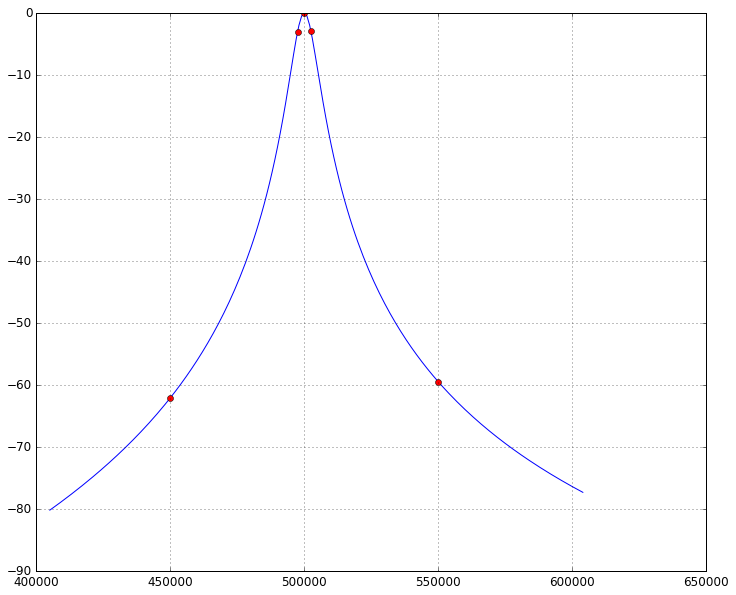

In [162]:




SSF = dict()
for m in np.arange(1,n+1,1):
    if m not in SSF: SSF[m]=dict()
    SSF[m]['Q']= SS_Q(fs, fo, 2**-.5, n)     
    SSF[m]['f']= fo  

# diccionario del filtro, se usa para el calculo de la transferencia    
print(SSF)

# imprime en pantalla 
for f in [fci,fi,fo,fs,fcs]:
    print('|A(',f,'Hz)|=',RSS(f,SSF), 'dB')     

# plot de la respuesta
freq = np.arange(fci*0.9,fcs*1.1,1e3)    
plt.plot(freq,[RSS(fa,SSF) for fa in freq])

for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,SSF) ,'ro')

plt.grid()    
plt.show()


{1: {'Q': 200.00000000000003, 'f': 497834.93649053888}, 2: {'Q': 100.0, 'f': 500000.0}, 3: {'Q': 200.00000000000003, 'f': 502165.06350946112}}
|A( 450000.0 Hz)|= -91.5103119956 dB
|A( 497500.0 Hz)|= -15.0680357045 dB
|A( 500000.0 Hz)|= -12.0413067052 dB
|A( 502500.0 Hz)|= -15.0354626301 dB
|A( 550000.0 Hz)|= -88.8925125686 dB


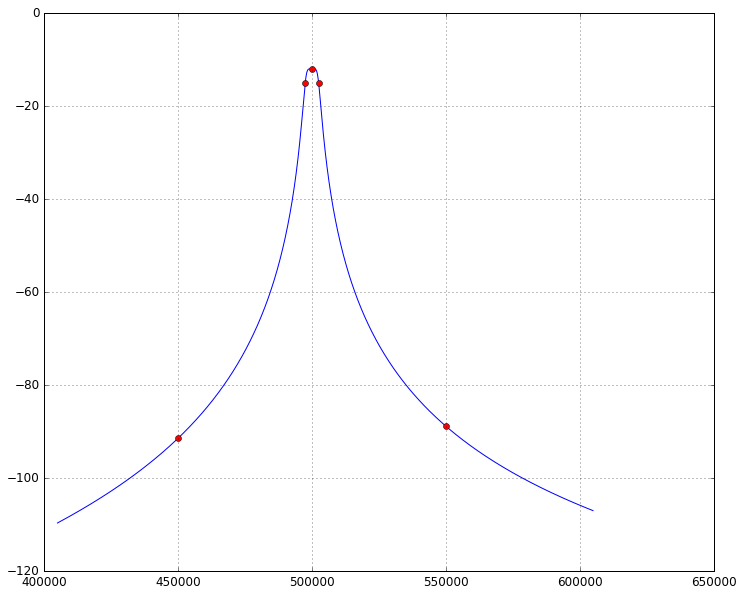

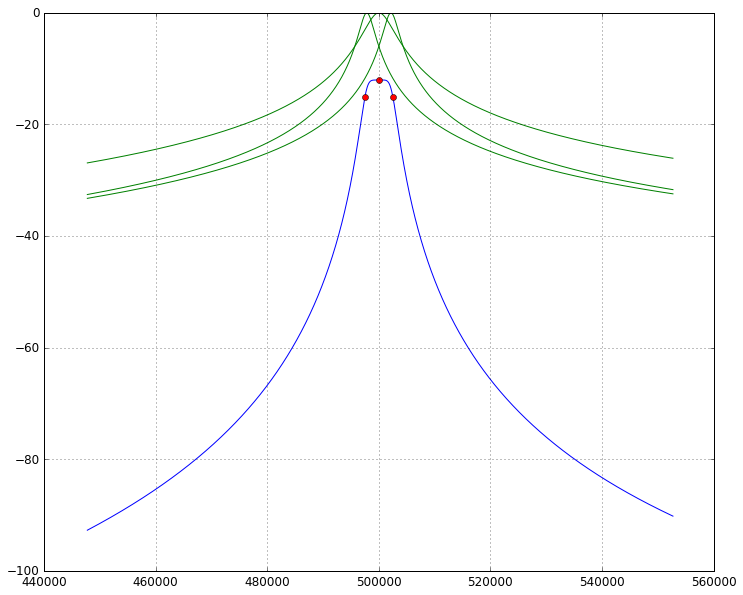

In [163]:
#Butterworth


BTF = dict()
for m in np.arange(1,n+1,1):
    if m not in BTF: BTF[m]=dict()
    BTF[m]['Q'] =BT_Q(fo,BW,n,m)     
    BTF[m]['f'] =BT_f(fo,BW,n,m)
    
# diccionario del filtro, se usa para el calculo de la transferencia    
print(BTF)

# imprime en pantalla 
for f in [fci,fi,fo,fs,fcs]:
    print('|A(',f,'Hz)|=',RSS(f,BTF), 'dB')     

# plot de la respuesta, se grafican las frecuencias de canales adyacentes
freq = np.arange(fci*0.9,fcs*1.1,fo/1e4)    
plt.plot(freq,[RSS(fa,BTF) for fa in freq])

for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,BTF) ,'ro')

plt.grid()    
plt.show()


# plot de la respuesta para la banda de paso
freq = np.arange(fi*0.9,fs*1.1,fo/1e4)    
plt.plot(freq,[RSS(fa,BTF) for fa in freq])

for m in np.arange(1,n+1,1):
    BTFn = dict()
    BTFn[m] =  BTF[m]
    plt.plot(freq,[RSS(fa,BTFn) for fa in freq], 'g-')    

for f in [fi,fo,fs]:
    plt.plot(f,RSS(f,BTF) ,'ro')

plt.grid()    
plt.show()



{1: {'Q': 671.06308874591366, 'f': 497740.82640346116}, 2: {'Q': 335.53154437295677, 'f': 500000.0}, 3: {'Q': 671.06308874591366, 'f': 502259.17359653884}}
|A( 450000.0 Hz)|= -123.03954483 dB
|A( 497500.0 Hz)|= -34.5888302002 dB
|A( 500000.0 Hz)|= -31.5440890475 dB
|A( 502500.0 Hz)|= -34.5204177097 dB
|A( 550000.0 Hz)|= -120.418775083 dB


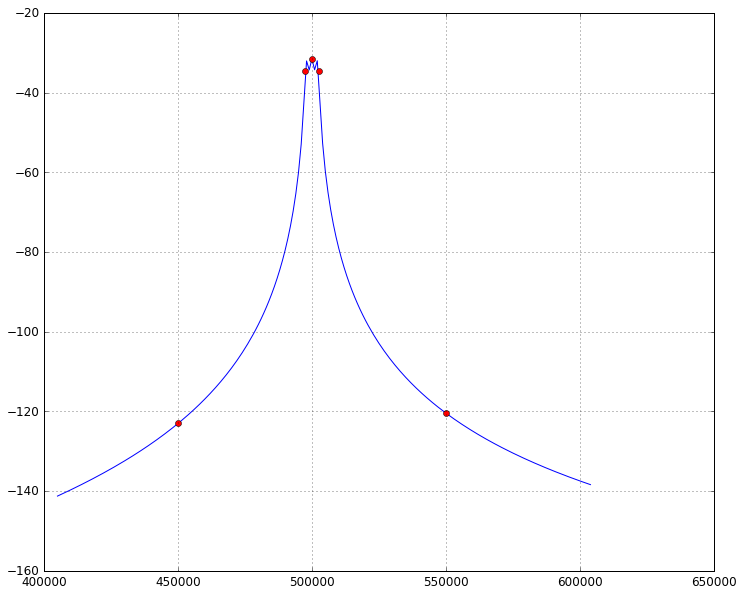

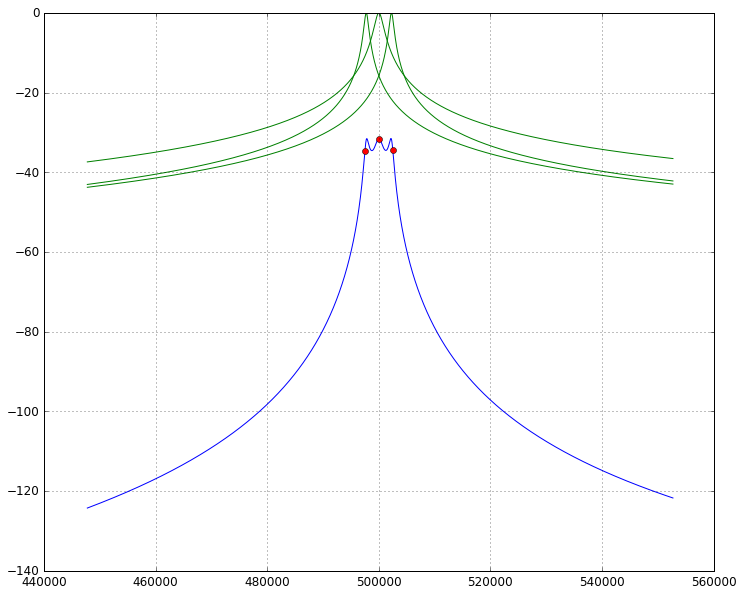

In [164]:
#Chevishev
n = 3 # numero de polos

CVF = dict()
for m in np.arange(1,n+1,1):
    if m not in CVF: CVF[m]=dict()
    CVF[m]['Q'] =CV_Q(fo,BW,n,m)     
    CVF[m]['f'] =CV_f(fo,BW,n,m)
    
# diccionario del filtro, se usa para el calculo de la transferencia    
print(CVF)    
    
# imprime en pantalla 
for f in [fci,fi,fo,fs,fcs]:
    print('|A(',f,'Hz)|=',RSS(f,CVF), 'dB')     

# plot de la respuesta, se grafican las frecuencias de canales adyacentes
freq = np.arange(fci*0.9,fcs*1.1,1e3)    
plt.plot(freq,[RSS(fa,CVF) for fa in freq])

for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,CVF) ,'ro')

plt.grid()    
plt.show()


# plot de la respuesta para la banda de paso
freq = np.arange(fi*0.9,fs*1.1,fo/1e4)    
plt.plot(freq,[RSS(fa,CVF) for fa in freq])

for m in np.arange(1,n+1,1):
    CVFn = dict()
    CVFn[m] =  CVF[m]
    plt.plot(freq,[RSS(fa,CVFn) for fa in freq], 'g-')    

for f in [fi,fo,fs]:
    plt.plot(f,RSS(f,CVF) ,'ro')

plt.grid()    
plt.show()


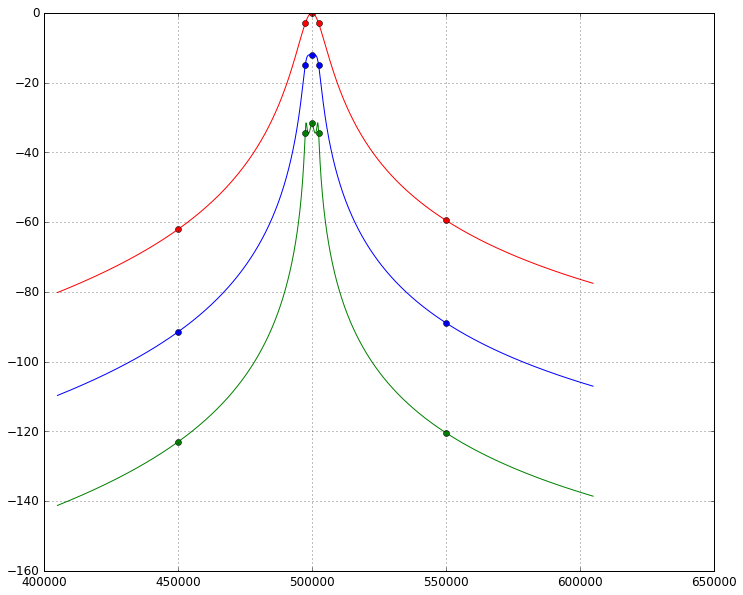

In [165]:
# Comparación 
freq = np.arange(fci*0.9,fcs*1.1,fo/1e4)    

# plot de la respuesta Simple Sintonizado Sincronico
plt.plot(freq,[RSS(fa,SSF) for fa in freq], 'r')
for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,SSF) ,'ro')

#Butterworth
plt.plot(freq,[RSS(fa,BTF) for fa in freq], 'b')
for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,BTF) ,'bo')

#Chevishev
plt.plot(freq,[RSS(fa,CVF) for fa in freq], 'g')
for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,CVF) ,'go')
    
plt.grid()
plt.show()

OJO que el filtro Butterworth tiene que amplificar : 12.0413067052 dB para que podamos comparalo con un simple sintonizado sincronico
OJO que el fitro Chevishev tiene que amplificar : 31.5440890475 dB para que podamos comparalo con un simple sintonizado sincronico


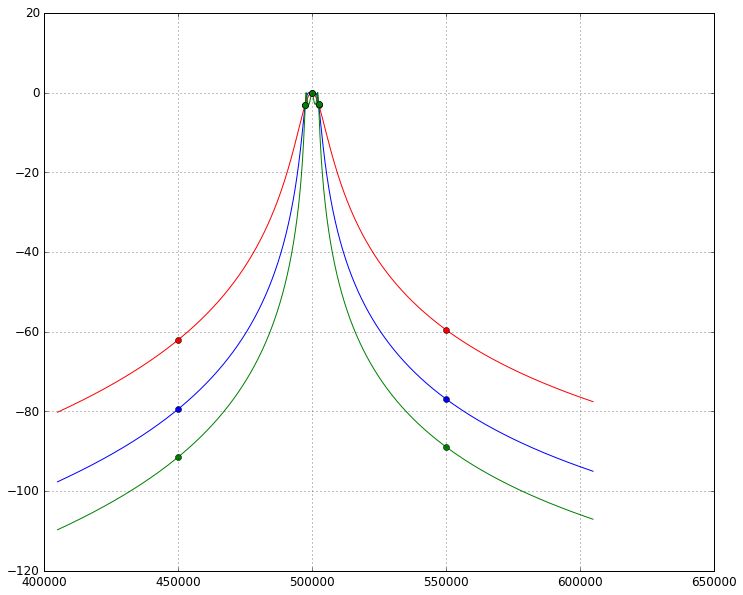

In [166]:
# Comparación 
freq = np.arange(fci*0.9,fcs*1.1,fo/1e4)    

# plot de la respuesta Simple Sintonizado Sincronico
plt.plot(freq,[RSS(fa,SSF) for fa in freq], 'r')
for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,SSF) ,'ro')

#Butterworth
print('OJO que el filtro Butterworth tiene que amplificar :', abs(RSS(fo,BTF)), 'dB para que podamos comparalo con un simple sintonizado sincronico')     
plt.plot(freq,[RSS(fa,BTF)-RSS(fo,BTF) for fa in freq], 'b')
for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,BTF)-RSS(fo,BTF) ,'bo')

#Chevishev
print('OJO que el fitro Chevishev tiene que amplificar :', abs(RSS(fo,CVF)), 'dB para que podamos comparalo con un simple sintonizado sincronico')     
plt.plot(freq,[RSS(fa,CVF)-RSS(fo,CVF) for fa in freq], 'g')
for f in [fci,fi,fo,fs,fcs]:
    plt.plot(f,RSS(f,CVF)-RSS(fo,CVF) ,'go')
    
plt.grid()
plt.show()



OJO que el filtro Butterworth tiene que amplificar : 12.0421618391 dB para que podamos comparalo con un simple sintonizado sincronico
OJO que el fitro Chevishev tiene que amplificar : 31.5451432566 dB para que podamos comparalo con un simple sintonizado sincronico


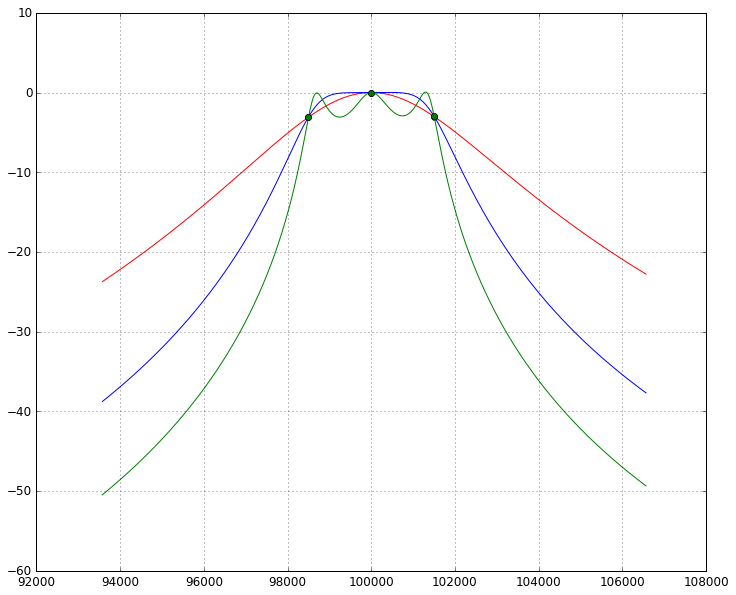

In [160]:
# Comparación 
freq = np.arange(fi*0.95,fs*1.05,fo/1e4)    

# plot de la respuesta Simple Sintonizado Sincronico
plt.plot(freq,[RSS(fa,SSF) for fa in freq], 'r')
for f in [fi,fo,fs]:
    plt.plot(f,RSS(f,SSF) ,'ro')

#Butterworth
print('OJO que el filtro Butterworth tiene que amplificar :', abs(RSS(fo,BTF)), 'dB para que podamos comparalo con un simple sintonizado sincronico')     
plt.plot(freq,[RSS(fa,BTF)-RSS(fo,BTF) for fa in freq], 'b')
for f in [fi,fo,fs]:
    plt.plot(f,RSS(f,BTF)-RSS(fo,BTF) ,'bo')

#Chevishev
print('OJO que el fitro Chevishev tiene que amplificar :', abs(RSS(fo,CVF)), 'dB para que podamos comparalo con un simple sintonizado sincronico')     
plt.plot(freq,[RSS(fa,CVF)-RSS(fo,CVF) for fa in freq], 'g')
for f in [fi,fo,fs]:
    plt.plot(f,RSS(f,CVF)-RSS(fo,CVF) ,'go')
    
plt.grid()
plt.show()
